# Data Analytics in Python 3
(JupyterLab and Jupyter Notebooks)  📓

---

### Content
#### Exploring the Matplotlib library
* subplots
* figures
* colours, markers, and styles

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

import pandas as pd

In [2]:
#using pandas

data_dummy = {
    'x_points': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'y1_points': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'y2_points': [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
}

In [3]:
df_dummy = pd.DataFrame(data_dummy)

df_dummy

,x_points,y1_points,y2_points
0,1,10,1
1,2,20,4
2,3,30,9
3,4,40,16
4,5,50,25
5,6,60,36
6,7,70,49
7,8,80,64
8,9,90,81
9,10,100,100


### Creating subplots
With the `subplot()` function you can draw multiple plots in one figure:

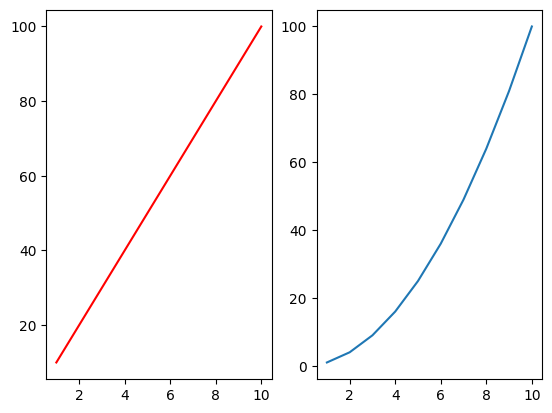

In [4]:
plt.subplot(1,2,1)
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.plot(data_dummy["x_points"], data_dummy["y1_points"], c = "red")

plt.subplot(1,2,2)
#the figure has 1 row, 2 columns, and this plot is the second plot.
plt.plot(data_dummy["x_points"], data_dummy["y2_points"])

### Types of figures(plots): Pairwise

##### `plot(x,y)`
Line graph: ideal for showing growth rates or trends at even intervals.

##### `scatter(x, y)`
Displays relationships between varying variables. It's suitable for displaying associations and correlations.



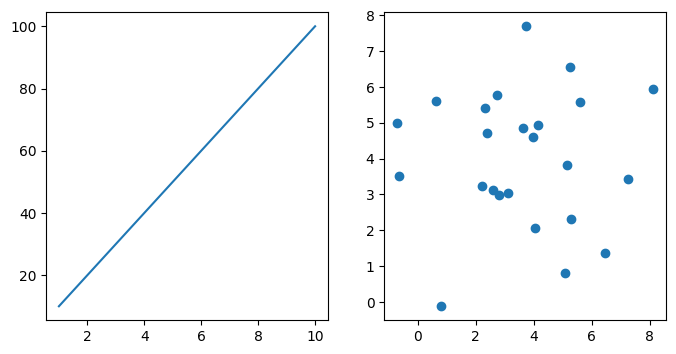

In [5]:
# plot

plt.figure(figsize=(8, 4)) # adjusting the entire figure size 12inches x 6inches

plt.subplot(1,2,1)
plt.plot(df_dummy["x_points"], df_dummy["y1_points"])

# scatter

plt.subplot(1,2,2)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))

plt.scatter(x, y)


##### `bar(x, height)`
Shows each data category in a frequency distribution. Used to compare things between different groups or to track changes over time.

##### `stem(x,y)`
Draws lines perpendicular to a baseline at each location locs from the baseline to heads, and places a marker there. useful tool for visualizing discrete data points and their magnitudes


<StemContainer object of 3 artists>

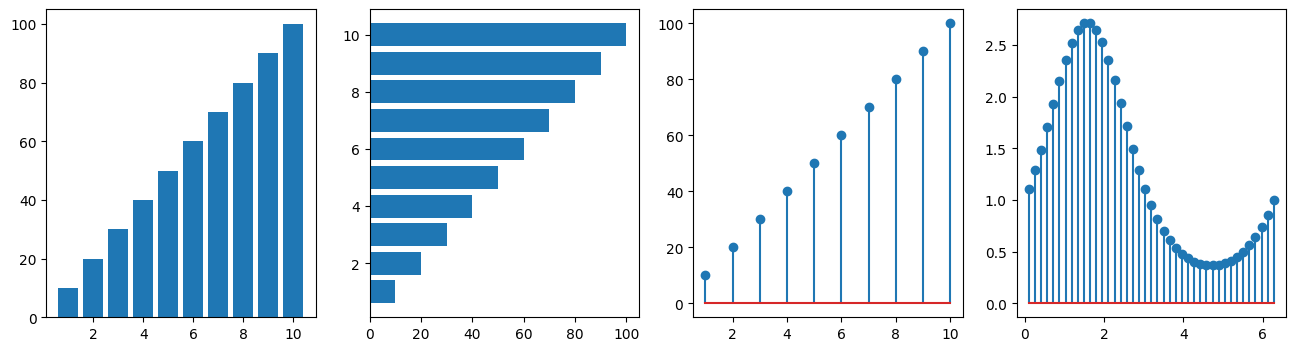

In [6]:
# bar

plt.figure(figsize=(16, 4)) # adjusting the entire figure size 16inches x 4inches

plt.subplot(1,4,1) # subplot frame
plt.bar(df_dummy["x_points"], df_dummy["y1_points"])

plt.subplot(1,4,2) # subplot frame
plt.barh(df_dummy["x_points"], df_dummy["y1_points"])

# stem

plt.subplot(1,4,3) # subplot frame
plt.stem(df_dummy["x_points"], df_dummy["y1_points"])

plt.subplot(1,4,4) # subplot frame
x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)


##### `fill_between(x,y1,y2)`
Fill the area between two horizontal curves. This is good for creating confidence intervals.
Confidence intervals (CIs) are used in statistics to indicate the range within which we can expect a population parameter (such as a mean or proportion) to lie, with a certain level of confidence.



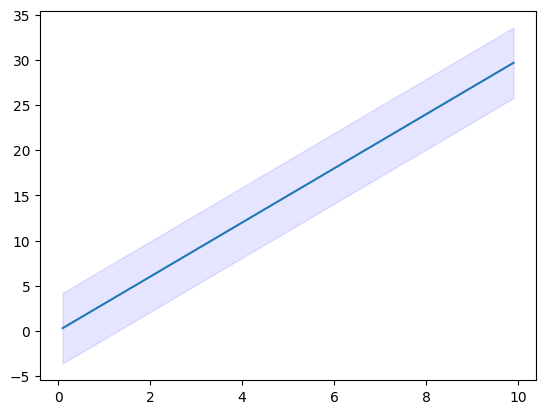

In [7]:
# fill_between


#confidence band example 1

#some example data
x1 = np.linspace(0.1, 9.9, 20) # Return evenly spaced numbers over a specified interval
y1 = 3.0 * x1

#some confidence interval
ci = 1.96 * np.std(y1)/np.sqrt(len(x1))

fig, ax = plt.subplots()
ax.plot(x1,y1)
ax.fill_between(x1, (y1-ci), (y1+ci), color='b', alpha=.1) # alpha for transparency


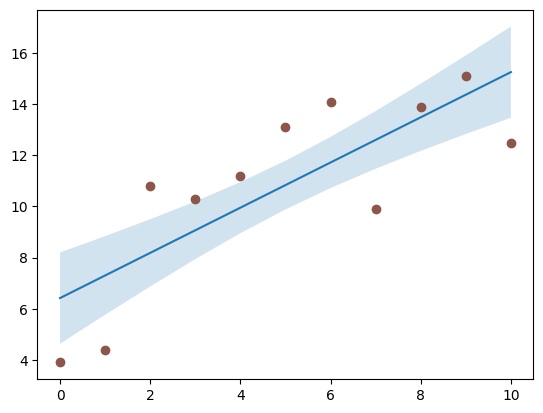

In [8]:
#confidence band example 2

x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown') # adding a marker for the points and colour


##### `stairs(values)`
Draw a stepwise constant function as a line or a filled plot.

##### `stackplot(x,y)`
Used to draw a stacked area plot. It displays the complete data for visualization. It shows each part stacked onto one another and how each part makes the complete figure. It displays various constituents of data and it behaves like a pie chart. It has x-label, y-label, and title in which various parts can be represented by different colors.

[[  1   2   3   4   5   6   7   8   9  10]
 [ 10  20  30  40  50  60  70  80  90 100]
 [  1   4   9  16  25  36  49  64  81 100]]
[ 0  2  4  6  8 10 12 14 16 18]


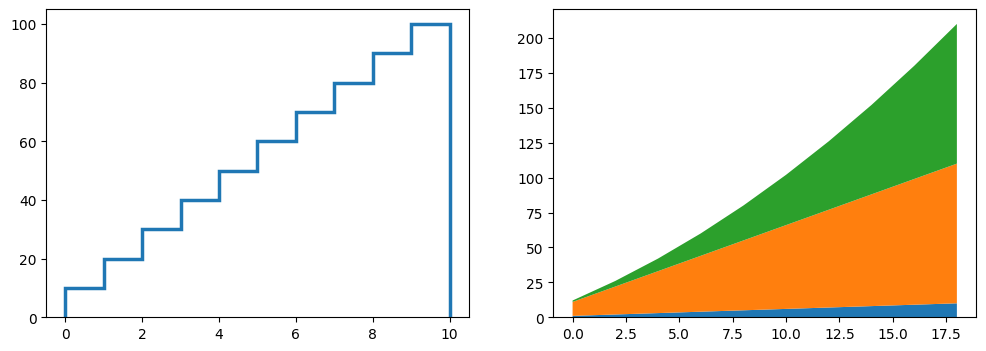

In [9]:
# stairs

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.stairs(df_dummy["y1_points"], linewidth=2.5)

# stackplot

plt.subplot(1,2,2)
x_l6 = np.arange(0, 20, 2)
y_l6 = np.vstack([df_dummy["x_points"], df_dummy["y1_points"], df_dummy["y2_points"]])
print(y_l6)
print(x_l6)

plt.stackplot(x_l6,y_l6)

<Figure size 1000x600 with 0 Axes>

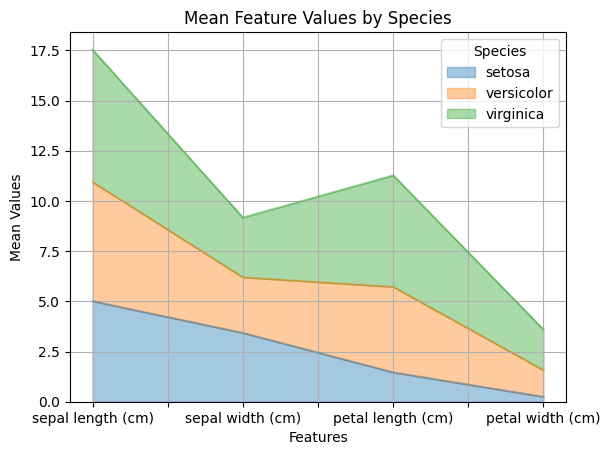

In [10]:
# creating and formatting stack plot, here we will be using the iris dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# loading the iris dataset
iris = load_iris()
iris_df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df2['species'] = iris.target

# Convert the species numbers to species names
iris_df2['species'] = iris_df2['species'].apply(lambda x: iris.target_names[x])

# Plotting an area plot (fill graph)
plt.figure(figsize=(10, 6))

# We will plot the mean values of each feature for each species
iris_mean = iris_df2.groupby('species').mean()

# Plotting
iris_mean.T.plot(kind='area', stacked=True, alpha=0.4)
plt.title('Mean Feature Values by Species')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.legend(title='Species')
plt.grid(True)
plt.show()



### Colours, markers, and styles
* Types of Different markers: https://matplotlib.org/stable/api/markers_api.html
* Hex colour codes: https://htmlcolorcodes.com/
* Line styles:
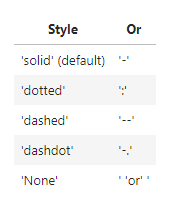


<ipython-input-11-f33ba75288ad>:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x2, y2_est, '-', c = '#33691E', linewidth = '10.5', linestyle = 'dashed' ) # using hexcolour codes


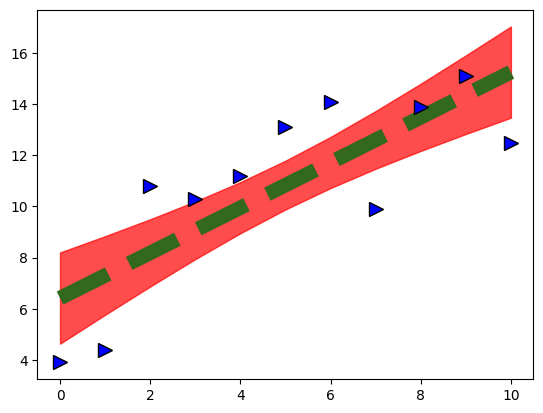

In [11]:
# using our confidence band example 2

x2 = np.linspace(0, 10, 11)
y2 = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

a2, b2 = np.polyfit(x2, y2, deg=1)
y2_est = a2 * x2 + b2
y2_err = x2.std() * np.sqrt(1/len(x) +
                          (x2 - x2.mean())**2 / np.sum((x2 - x2.mean())**2))

# line
fig, ax = plt.subplots()
ax.plot(x2, y2_est, '-', c = '#33691E', linewidth = '10.5', linestyle = 'dashed' ) # using hexcolour codes

# fill
ax.fill_between(x2, y2_est - y2_err, y2_est + y2_err,  color = 'red', alpha=0.7) # colour and opacity

# points
ax.plot(x, y, '>', color='blue', ms = 10, mec = "black") # ms = marker size. mec = marker outline colour

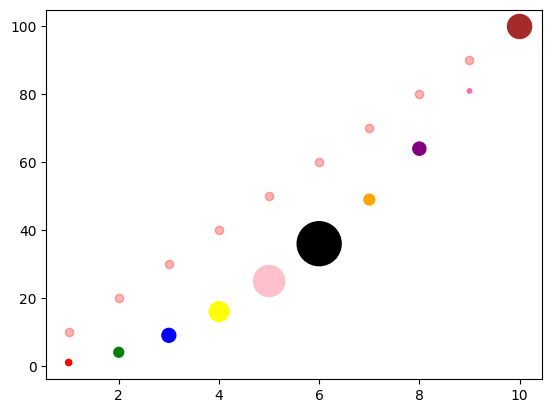

In [23]:
col1 = np.array(["red","green","blue","yellow","pink","black","orange","purple","hotpink","brown"])

plt.scatter(data_dummy["x_points"], data_dummy["y1_points"], c = "red", alpha = 0.3)
plt.scatter(data_dummy["x_points"], data_dummy["y2_points"], c = col1, s = [20,50,100,200,500,1000,60,90,10,300])

### Statistical Distributions
#### Histogram

> A histogram is a graphical representation of the distribution of numerical data. It consists of bars where the height of each bar represents the frequency (or count) of data points within a specific range (bin) of values along the x-axis.

> Histograms are used to visualize the distribution of data, showing how data points are distributed across different ranges or bins. They help identify patterns such as skewness, central tendency, and spread in the data.

`np.random.normal(40, 10, 80)` generates random numbers from a normal (Gaussian) distribution using NumPy's random.normal function

`random.normal(size=1000)` generates an array of 1000 random numbers from a standard normal distribution, which has a mean of 0 and a standard deviation of 1. This means the generated numbers will be centered around 0 with most numbers lying within a range of -3 to +3 (approximately, due to the properties of the normal distribution).

`np.random.seed(1)` is used to set the seed for NumPy's random number generator. This ensure reproducibility for testing.

(array([[ 10.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  4.,  79.,  69.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  20., 267., 203.,   3.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  35., 663., 344.,   7.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  91., 931., 401.,   2.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  82., 803., 240.,   4.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,  55., 362., 104.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  18., 138.,  20.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,  16.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]]),
 array([-3.25303423, -2.53187054, -1.81070685, -1.08954315, -0.36837946,
         0.35278423,  1.07394793,  1.79511162,  2.51627532,  3.23743901,
         3.9586027 ]),
 array([-4.24288693, -3.34869544, -2.45450395, -1.56031246, -0.66612097,
         0.22807052,  1.12226201,  2.0164535 ,  2.910644

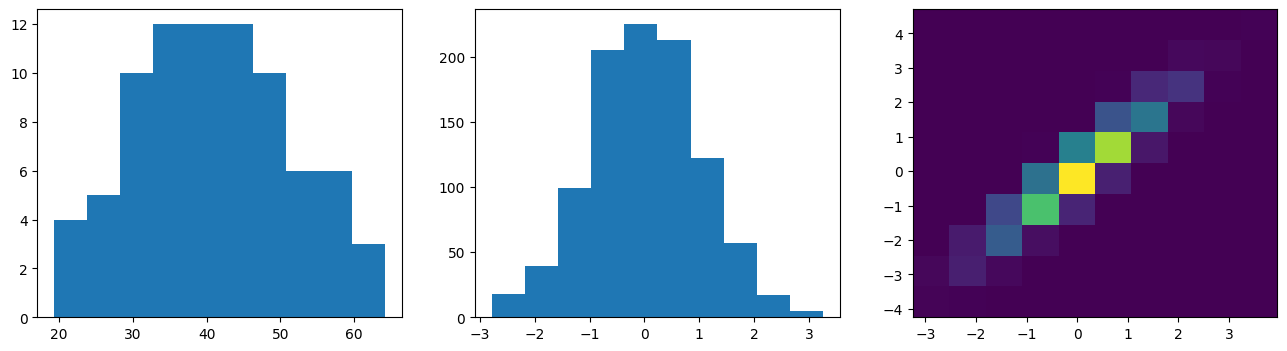

In [13]:
# histogram

plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
plt.hist(np.random.normal(40, 10, 80))

plt.subplot(1,3,2)
plt.hist(random.normal(size=1000))


# 2D histogram

plt.subplot(1,3,3)

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

plt.hist2d(x,y)

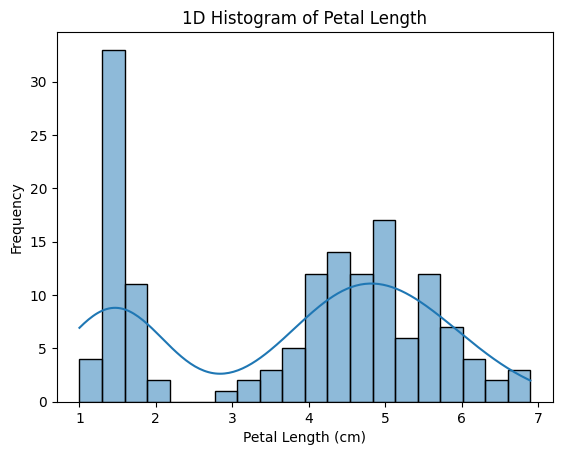

In [14]:
# histogram data example
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib

# 1D Histogram for petal length
sns.histplot(iris_df2['petal length (cm)'], bins=20, kde=True)
plt.title('1D Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

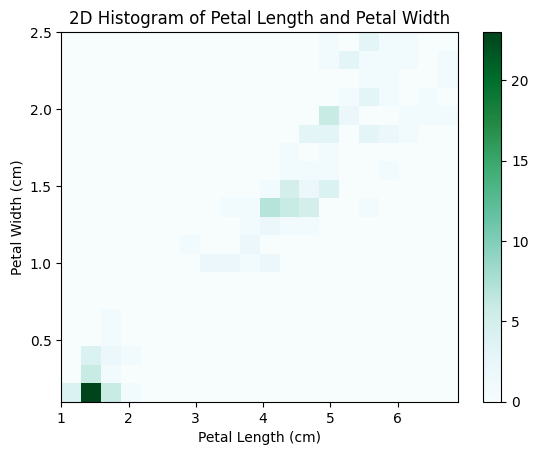

In [15]:
# 2D Histogram for petal length vs petal width

plt.hist2d(iris_df2['petal length (cm)'], iris_df2['petal width (cm)'], bins=(20, 20), cmap=plt.cm.BuGn)
plt.colorbar()
plt.title('2D Histogram of Petal Length and Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

#### Boxplot
> Standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. The box represents the interquartile range (IQR) (Q3 - Q1), with the median marked by a line inside the box. Whiskers extend from the box to show the range of the data outside the IQR, and outliers are often displayed individually.

> Boxplots are useful for comparing distributions of data across different groups or variables and for identifying outliers and skewness in the data.

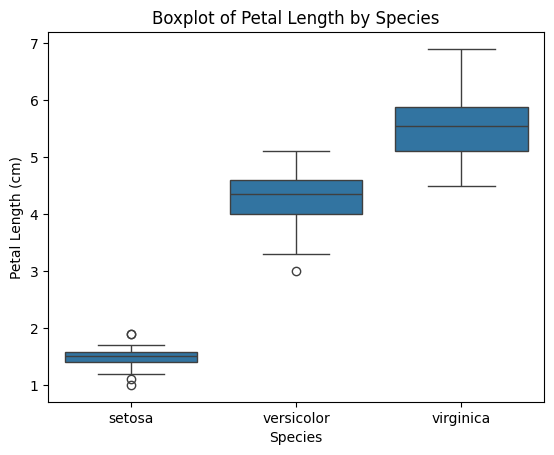

In [16]:
# Boxplot for petal length across different species

sns.boxplot(x='species', y='petal length (cm)', data=iris_df2)
plt.title('Boxplot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

#### Error Bar Plot
> A graphical representation of the variability of data. It usually consists of a line or marker representing the central tendency (mean, median) of the data and bars extending from it that indicate the range of variability (e.g., standard deviation, confidence interval).

> Error bars are used to visually communicate the uncertainty or variability associated with data points or estimates, especially in scientific and experimental contexts.

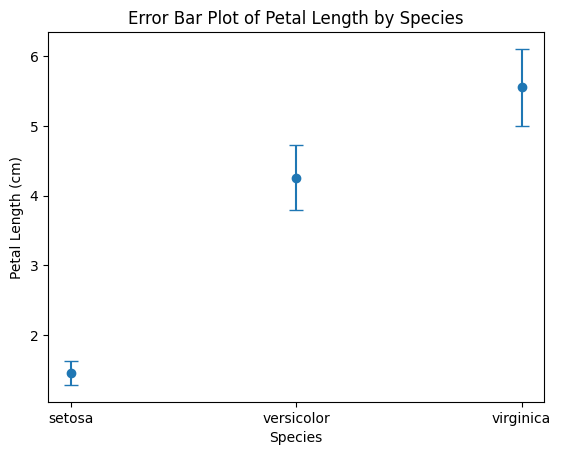

In [17]:
# Error bar plot for petal length by species

species_means = iris_df2.groupby('species')['petal length (cm)'].mean()
species_stds = iris_df2.groupby('species')['petal length (cm)'].std()
species = species_means.index

plt.errorbar(species, species_means, yerr=species_stds, fmt='o', capsize=5)
plt.title('Error Bar Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

#### Violin plot
> Is a combination of a boxplot and a kernel density plot. It displays the distribution of data across different levels of one or more categorical variables. The width of the "violin" represents the frequency or density of data points at different values, giving a more detailed view of the distribution compared to a boxplot.

> Violin plots are useful for comparing the distribution of data across different categories or groups, providing insights into both central tendency and variability.

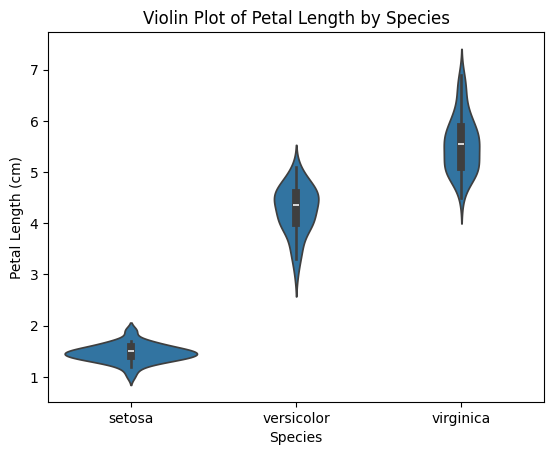

In [18]:
# Violin plot for petal length across different species

sns.violinplot(x='species', y='petal length (cm)', data=iris_df2)
plt.title('Violin Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

#### Event Plot
> An event plot is used to display the occurrence of events (usually points in time) along a single axis, typically the y-axis. Each event is represented as a vertical line or marker at its corresponding position on the axis.

> Event plots are used to visualize the timing and frequency of events, making them useful in fields such as signal processing, neuroscience, and time-series analysis.

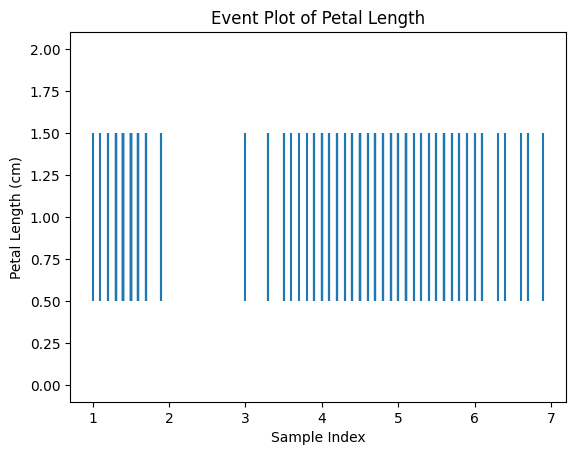

In [19]:
# Event plot for petal length

plt.eventplot(iris_df2['petal length (cm)'])
plt.title('Event Plot of Petal Length')
plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.show()

#### Hexbin Plot
> A hexbin plot is a two-dimensional histogram where the data points are divided into hexagonal bins. The color intensity or density of each hexagon represents the number of data points falling within that bin.

> Hexbin plots are used to visualize the distribution of data points in a two-dimensional space, especially when dealing with large datasets or when scatter plots become too dense to interpret clearly.

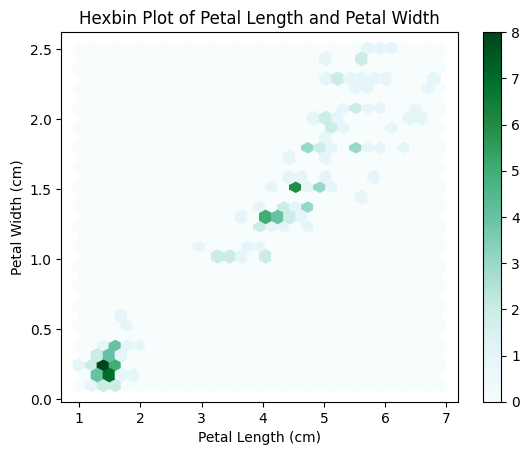

In [20]:
# Hexbin plot for petal length vs petal width

plt.hexbin(iris_df2['petal length (cm)'], iris_df2['petal width (cm)'], gridsize=30, cmap='BuGn')
plt.colorbar()
plt.title('Hexbin Plot of Petal Length and Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

#### Pie Chart
> A circular graph divided into slices, each representing a proportion of a whole. The size of each slice is proportional to the percentage it represents of the total.

> Pie charts are used to show the relative contribution of different categories or parts to a whole. They are useful for displaying categorical data and emphasizing the proportions of each category.

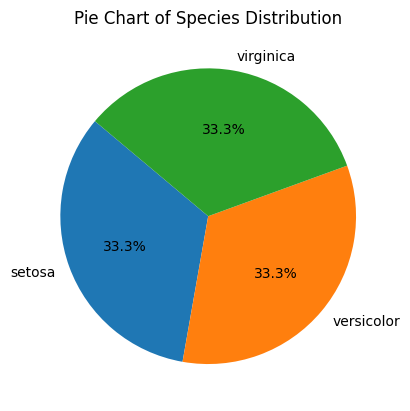

In [21]:
# Pie chart for species distribution

species_counts = iris_df2['species'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Species Distribution')
plt.show()

#### Cumulative Distribution plot
> A cumulative distribution plot (often called an empirical cumulative distribution function, ECDF) shows the proportion or cumulative count of observations falling below each unique value in a dataset. It starts at 0 and ends at 1, showing how data accumulates over the range of values.

> Cumulative distribution plots are used to visualize the distribution of data and to compare the empirical distribution to theoretical distributions. They provide insights into the distribution's shape, spread, and central tendency.


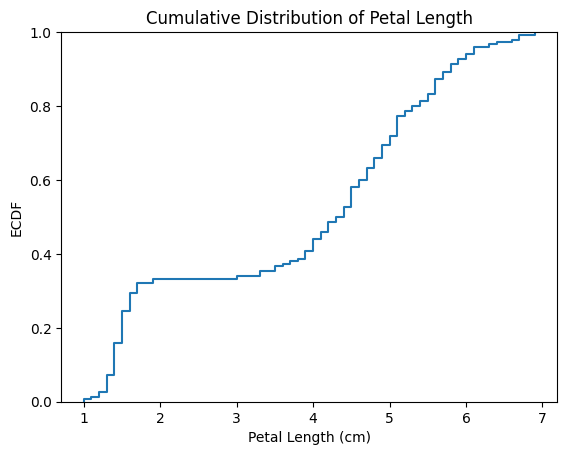

In [22]:
# Cumulative distribution plot for petal length

sns.ecdfplot(iris_df2['petal length (cm)'])
plt.title('Cumulative Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('ECDF')
plt.show()